In [1]:
import sys

sys.path.append('..')
from db import DB

key_prefix = 'adfr_cross_decoys_'
keys = DB.keys(key_prefix + '*')
keys.sort()

In [2]:
DB.hgetall(keys[1])

{'error': 'False',
 'attempted': 'True',
 'num_protein_atoms': '184',
 'finished': 'True',
 'top_adfr_predicted_affinity (kcal/mol)': '-4.1',
 'ligand_file': '/usr/project/dlab/Users/jaden/pdbscreen/cross_decoy_pdbs/1/ligand.pdb',
 'total_atoms': '203',
 'num_ligand_atoms': '19',
 'output_log': '/usr/project/xtmp/yl708/adfr_benchmark_prepared/adfr_cross_decoys_1_summary.dlg',
 'protein_file': '/usr/project/dlab/Users/jaden/pdbscreen/cross_decoy_pdbs/1/protein.pdb'}

In [3]:
from functional import seq
from tqdm import tqdm

results = seq(tqdm(keys)).map(lambda x: DB.hgetall(x)).list()

100%|██████████| 10000/10000 [00:12<00:00, 813.94it/s]


In [4]:
import pandas as pd

df = pd.DataFrame(results)

In [5]:
cleaned_df = df[df['top_adfr_predicted_affinity (kcal/mol)'].notna()]
cleaned_df

,error,attempted,num_protein_atoms,finished,top_adfr_predicted_affinity (kcal/mol),ligand_file,total_atoms,num_ligand_atoms,output_log,protein_file
0,False,True,383,True,-9.7,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,415,32,/usr/project/xtmp/yl708/adfr_benchmark_prepare...,/usr/project/dlab/Users/jaden/pdbscreen/cross_...
1,False,True,184,True,-4.1,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,203,19,/usr/project/xtmp/yl708/adfr_benchmark_prepare...,/usr/project/dlab/Users/jaden/pdbscreen/cross_...
2,False,True,317,True,-8.3,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,345,28,/usr/project/xtmp/yl708/adfr_benchmark_prepare...,/usr/project/dlab/Users/jaden/pdbscreen/cross_...
3,False,True,383,True,-7.7,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,421,38,/usr/project/xtmp/yl708/adfr_benchmark_prepare...,/usr/project/dlab/Users/jaden/pdbscreen/cross_...
4,False,True,263,True,-6.1,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,291,28,/usr/project/xtmp/yl708/adfr_benchmark_prepare...,/usr/project/dlab/Users/jaden/pdbscreen/cross_...
...,...,...,...,...,...,...,...,...,...,...
9993,False,True,399,True,-8.0,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,419,20,/usr/project/xtmp/yl708/adfr_benchmark_prepare...,/usr/project/dlab/Users/jaden/pdbscreen/cross_...
9995,False,True,345,True,-8.6,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,380,35,/usr/project/xtmp/yl708/adfr_benchmark_prepare...,/usr/project/dlab/Users/jaden/pdbscreen/cross_...
9996,False,True,294,True,-7.1,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,321,27,/usr/project/xtmp/yl708/adfr_benchmark_prepare...,/usr/project/dlab/Users/jaden/pdbscreen/cross_...
9997,False,True,415,True,-8.0,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,439,24,/usr/project/xtmp/yl708/adfr_benchmark_prepare...,/usr/project/dlab/Users/jaden/pdbscreen/cross_...


In [6]:

import numpy as np

# Constants
R = 8.3144621 # J/(mol*K)
T = 298.15 # K

def delta_G_to_pKd(delta_G):
    """ delta_G in kcal/mol, pKd in M
    """
    return -delta_G * 1000 / (R * T * np.log(10)) * 4.184

def pKd_to_delta_G(pKd):
    """ pKd in M, delta_G in kcal/mol
    """
    return -pKd * R * T * np.log(10) / 1000 / 4.184

def get_affinity_from_stdout(x):
    """ Gets the GNINA CNN affinity from the stdout and convert to deltaG
    """
    return pKd_to_delta_G(float(seq(x.split('\n')).filter(lambda x: 'CNNaffinity' in x).list()[0].split()[-1]))

cleaned_df['top_adfr_predicted_affinity (kcal/mol)'] = cleaned_df['top_adfr_predicted_affinity (kcal/mol)'].astype(float)

/tmp/ipykernel_3509812/3402318207.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['top_adfr_predicted_affinity (kcal/mol)'] = cleaned_df['top_adfr_predicted_affinity (kcal/mol)'].astype(float)


Text(0.5, 1.0, 'Cross decoys predicted affinities by ADFR\nn=7436, mean=-7.64, stdev=1.98')

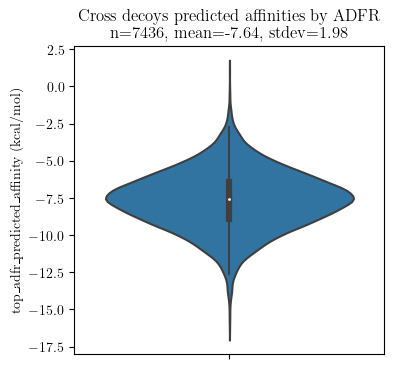

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import scipy.stats as stats


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman",
    "figure.figsize": (4, 4),
})

sns.violinplot(y='top_adfr_predicted_affinity (kcal/mol)', data=cleaned_df)
nobs, minmax, mean, variance, skewness, kurtosis = stats.describe(cleaned_df['top_adfr_predicted_affinity (kcal/mol)'])


plt.title('Cross decoys predicted affinities by ADFR\n' + f'n={nobs}, mean={mean:.2f}, stdev={np.sqrt(variance):.2f}')

In [8]:
export_df = cleaned_df[['protein_file', 'ligand_file', 'top_adfr_predicted_affinity (kcal/mol)']]
export_df

,protein_file,ligand_file,top_adfr_predicted_affinity (kcal/mol)
0,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,-9.7
1,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,-4.1
2,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,-8.3
3,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,-7.7
4,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,-6.1
...,...,...,...
9993,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,-8.0
9995,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,-8.6
9996,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,-7.1
9997,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,/usr/project/dlab/Users/jaden/pdbscreen/cross_...,-8.0


In [9]:
export_df.to_csv('adfr_cross_decoys.csv', index=False)